In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [3]:
data=pd.read_csv('telco.csv',sep=',')

In [4]:
#data=data.values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

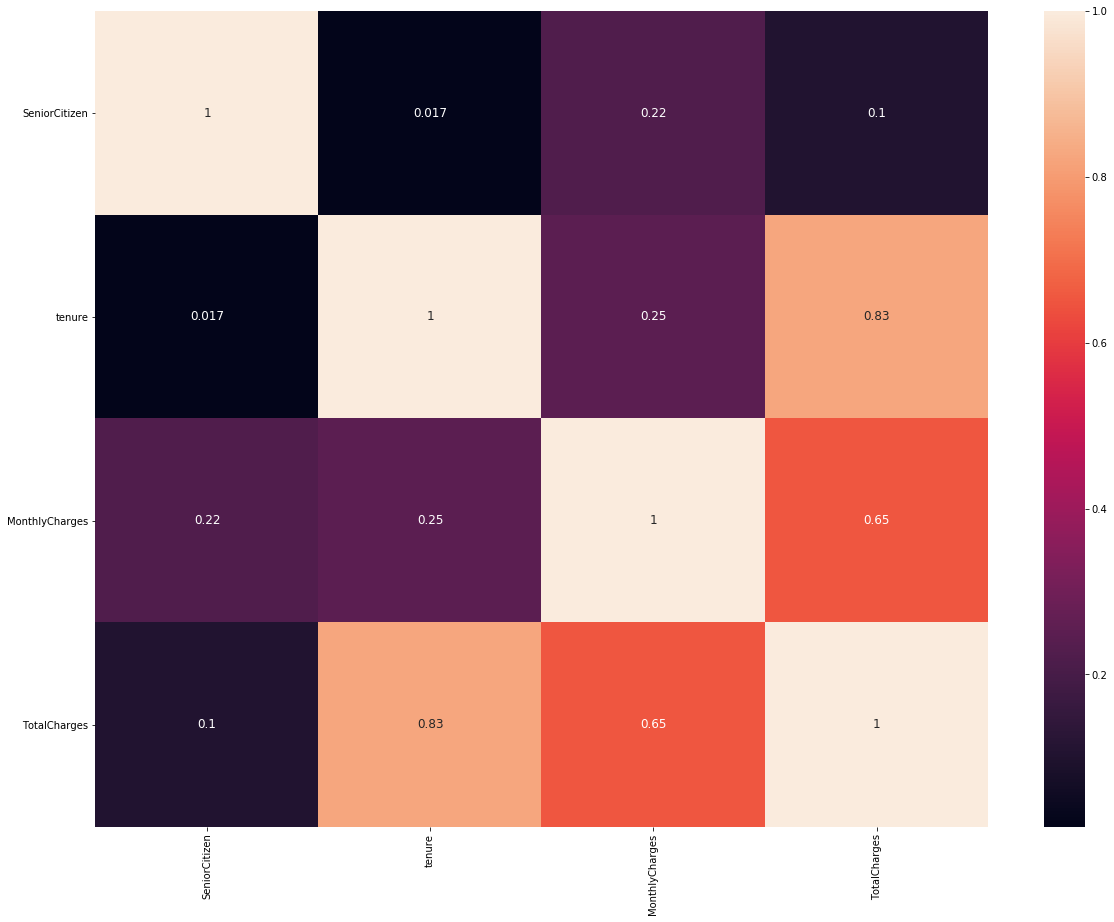

In [7]:
corr = data.corr(method='pearson')
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

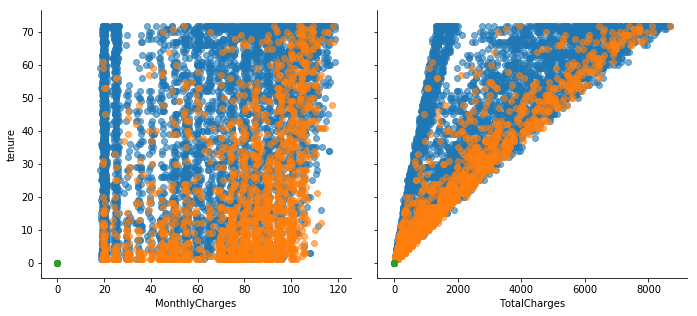

In [8]:
g = sns.PairGrid(data, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

In [9]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

data.pop('customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


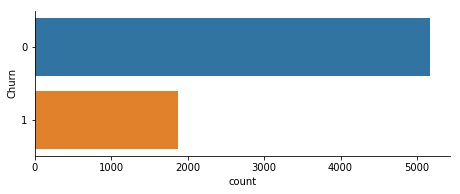

In [11]:
ax = sns.catplot(y="Churn", kind="count", data=data, height=2.6, aspect=2.5, orient='h')

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Using TensorFlow backend.


In [13]:
X = data.drop('Churn', 1)
y = data['Churn']

In [14]:
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({0: 5174, 1: 1869})


In [15]:
X_t, X_test, y_t, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40)

In [16]:
#X_train, y_train = X_t, y_t

In [17]:
X=pd.DataFrame(X_train, columns=X_train.columns.values)

NameError: name 'X_train' is not defined

In [18]:
print (X_train.columns.values)

NameError: name 'X_train' is not defined

In [16]:
print('Original dataset shape %s' % Counter(y_t))
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_t, y_t)
print('Resampled dataset shape %s' % Counter(y_train))
X_train=pd.DataFrame(X_train,columns=X.columns)

Original dataset shape Counter({0: 4140, 1: 1494})
Resampled dataset shape Counter({0: 4140, 1: 4140})


In [20]:
#X_train=X_train.values
#X_test=X_test.values

In [17]:
n_estimators=[500,800,1500,2500,5000]
max_features=['auto','sqrt','log2']
max_depth= [10,20,30,40,50]
max_depth.append(None)
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15]

grid_param={'n_estimators':n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [18]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)
#clf_random=RandomizedSearchCV(estimator=clf,param_distributions=grid_param,n_iter=500,verbose=10,cv=5,random_state=42,n_jobs=-1)

In [19]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)

In [20]:
y_pred=clf.predict(X_test)

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [22]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21788502484031227
Mean Squared Error: 0.21788502484031227
Root Mean Squared Error: 0.4667815600902763


In [35]:
y_true=y_test.tolist()

In [47]:
from sklearn.metrics import confusion_matrix
confM=confusion_matrix(y_true,y_pred,labels=[0,1])
confM=confM.tolist()

In [53]:
print (confM)

[[896, 138], [169, 206]]


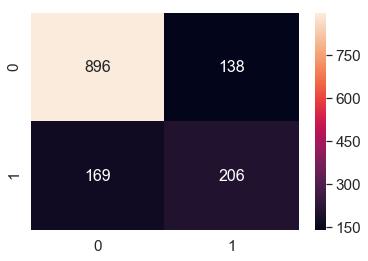

In [56]:
df_cm = pd.DataFrame(confM, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='d') # font size

plt.show()

In [27]:
from sklearn.metrics import classification_report
target_names = ['Non-Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Non-Churn       0.84      0.87      0.85      1034
       Churn       0.60      0.55      0.57       375

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [28]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_pred))

0.7821149751596878


In [57]:
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [41]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name)
    print(metrics.classification_report(y_test,predictions))

DecisionTree :
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1034
           1       0.49      0.52      0.51       375

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

RandomForest :
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1034
           1       0.58      0.47      0.52       375

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409

KNeighbours :


C:\Users\Pheonix Down\.conda\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1034
           1       0.44      0.66      0.53       375

    accuracy                           0.69      1409
   macro avg       0.64      0.68      0.65      1409
weighted avg       0.74      0.69      0.70      1409



C:\Users\Pheonix Down\.conda\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM :
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1034
           1       0.52      0.42      0.47       375

    accuracy                           0.74      1409
   macro avg       0.66      0.64      0.65      1409
weighted avg       0.73      0.74      0.73      1409

Neural Network :
              precision    recall  f1-score   support

           0       0.93      0.40      0.56      1034
           1       0.36      0.91      0.51       375

    accuracy                           0.54      1409
   macro avg       0.64      0.66      0.54      1409
weighted avg       0.77      0.54      0.55      1409

ExtraTreesClassifier :
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1034
           1       0.58      0.43      0.50       375

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.75     

C:\Users\Pheonix Down\.conda\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier :
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1034
           1       0.56      0.65      0.60       375

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.79      0.77      0.78      1409

GradientBoostingClassifier: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1034
           1       0.59      0.62      0.61       375

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

XGB :
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1034
           1       0.58      0.62      0.60       375

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg      

In [59]:
from sklearn.ensemble import VotingClassifier
clf4 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)
clf2 = LogisticRegression()
clf3 =  XGBClassifier(colsample_bytree= 0.6043861515534555, learning_rate= 0.017456463325448757, max_depth= 3, min_child_weight= 4, n_estimators= 832, subsample= 0.8040649088253156)
clf1=MLPClassifier(max_iter=100,activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (100,), learning_rate= 'constant', solver= 'adam')
eclf1 = VotingClassifier(estimators=[('NN',clf1),('lr',clf2) ,('xgb', clf3),('rf',clf4)], voting='soft')
clf3.fit(X_train, y_train)
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(metrics.classification_report(y_test,predictions))

C:\Users\Pheonix Down\.conda\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1034
           1       0.51      0.77      0.62       375

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [60]:
y_true=predictions.tolist()
confM=confusion_matrix(y_true,y_pred,labels=[0,1])
confM=confM.tolist()

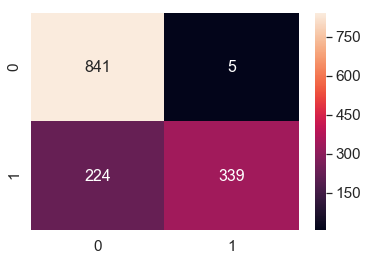

In [61]:
df_cm = pd.DataFrame(confM, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='d') # font size

plt.show()

In [35]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from xgboost import plot_importance

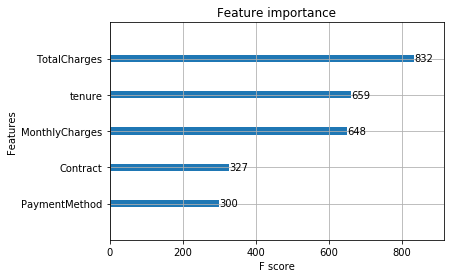

In [37]:
clf3.fit(X_train,y_train)
plot_importance(clf3, max_num_features=5) 
plt.show()

## TUNING HYPER PARAMETERS FOR CLASSIFIERS

In [220]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import KFold

### XGB

In [225]:
clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }


clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 500, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [226]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 22.1min finished


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scal...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BDE276AF98>,
                                        'max

In [228]:
print (clf.best_params_)

{'colsample_bytree': 0.6043861515534555, 'learning_rate': 0.017456463325448757, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 832, 'subsample': 0.8040649088253156}


In [229]:
clf_xgb = XGBClassifier(objective = 'binary:logistic',colsample_bytree= 0.6043861515534555, learning_rate= 0.017456463325448757, max_depth= 3, min_child_weight= 4, n_estimators= 832, subsample= 0.8040649088253156)

In [235]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6043861515534555, gamma=0,
              learning_rate=0.017456463325448757, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=832, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8040649088253156, verbosity=1)

In [236]:
predictions = clf_xgb.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1034
           1       0.60      0.60      0.60       375

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



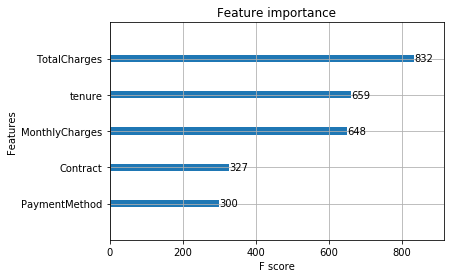

In [237]:
plot_importance(clf_xgb, max_num_features=5) # top 10 most important features
plt.show()

### MLP

In [270]:
mlp = MLPClassifier(max_iter=250)

In [271]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [272]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5,verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=250,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [273]:
print (clf.best_params_)

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [274]:
mlp = MLPClassifier(max_iter=100,activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (100,), learning_rate= 'constant', solver= 'adam')

In [280]:
mlp = MLPClassifier(max_iter=250,activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (50, 50, 50), learning_rate= 'constant', solver ='adam')

In [285]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=250, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [286]:
predictions = mlp.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.52      0.66      1034
           1       0.39      0.86      0.54       375

    accuracy                           0.61      1409
   macro avg       0.65      0.69      0.60      1409
weighted avg       0.77      0.61      0.63      1409

